Student name: Bhagyalakshmy Saburaj

Student id: 25275224

**Impotant**: The code for this activity takes long to run so we won't be able to run it again if something is wrong with your submitted notebook. Make sure that your code ran successfully and all outputs are visible before submitting your notebook.

General rules:

1. Do not change anything in the given code unless you are requested to.

2. Install any external libraries that you might want to use within the notebook file with the !pip install command, so that your code can run without errors during autotests. This rule doesn't apply for numpy, pandas, matplotlib, and sklearn.

3. For any code you add, don't use again any of the predefined names for variables, functions, or classes that are already included in the template (i.e. no duplicate names).

# Task: Deep neural networks

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Get the data and manipulate

We're going to use the Fashion MNIST dataset, which we can download from OpenML.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a set of 60,000 samples. Each sample is a 28x28 grayscale image, associated with a label from 10 classes.

Label IDs:
* T-shirt/top - 0
* Trouser - 1
* Pullover - 2
* Dress - 3
* Coat - 4
* Sandal - 5
* Shirt - 6
* Sneaker - 7
* Bag - 8
* Ankle boot - 9

We'll load up the Fashion-MNIST dataset. It will take a few seconds.


In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)

text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's also visualise a few random samples of this

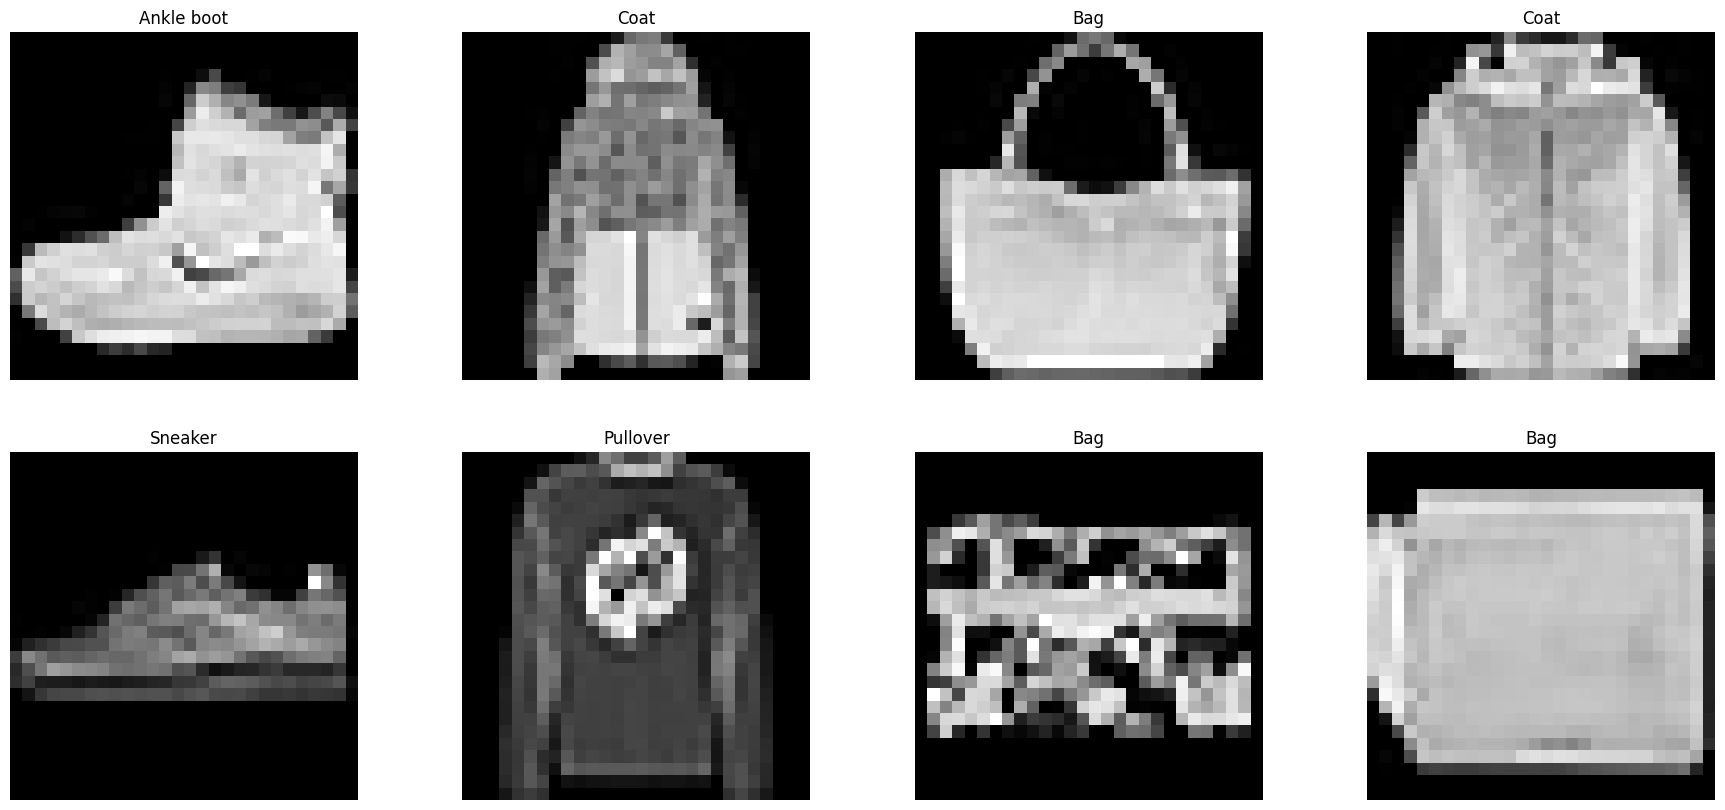

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = (0, 22, 100, 555, 666, 123, 10000, 55005)

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Visualize the image

fig, ax = plt.subplots(2, 4, figsize=(22, 10))
fig.subplots_adjust(wspace=0.3)
ax = ax.flatten()

for i in range(len(index)):
    ax[i].imshow(np.reshape(X[index[i]], (-1, 28)), cmap='gray', vmin=0, vmax=255)
    ax[i].axis('off')  # clear x-axis and y-axis
    ax[i].set_title(text_labels[int(y[index[i]])])

plt.show()

### Data manipulation

Firstly, do a train/test split. Keep 20% of the data for test. Fix the `random_state` so that the test is completely repeatible.

Then use the `StandardScaler` function from `sklearn.preprocessing`, as the multi-layer perceptron can be quite sensitive to data scaling.

Insert your code below:

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = X.astype(float) # Ensure X is float for scaling

# 1. Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert labels to integer for cleaner use in the model and metrics
y_train = y_train.astype(int)
y_test = y_test.astype(int)

## Task 1: Train a Perceptron (Weight 30/100)

1. A single artifical neuron is a Perceptron, so use `sklearn`'s implementation of the Percpetron, and train it.
2. Calculate and print the accuracy both on the train and test sets.
3. Discuss the result, does it seem good or bad?
4. Find an example where the classification is incorrect, and plot it. Discuss (e.g. does it kind of look like the clothing item that was predicted?)
5. Multiclass perceptron? We learned that the Percpetron is a binary classifier. Give a brief description of how multi-class perceptron might work. Of course, use the internet, but give it to me in your own words, and use a diagram as appropriate.

Insert your code below:

In [27]:
from sklearn.linear_model import Perceptron as Perceptron
# Initialize the Perceptron model
perceptron = Perceptron(random_state=35, max_iter=100, tol=1e-3)

# Train the Perceptron
perceptron.fit(X_train, y_train)

# Make predictions
y_train_pred = perceptron.predict(X_train)
y_test_pred = perceptron.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.8328
Test Accuracy: 0.8119


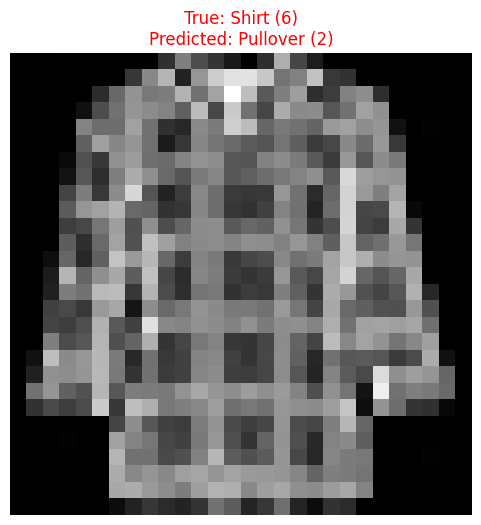

The model predicted: Pullover
The correct label was: Shirt


In [29]:
# Find the indices where prediction is incorrect
incorrect_indices = np.where(y_test != y_test_pred)[0]

# Pick any random incorrect example
if len(incorrect_indices) > 0:
    error_index_in_test_set = np.random.choice(incorrect_indices)

    # Inverse transform the scaled test sample to get original pixel values for plotting
    X_error_scaled = X_test[error_index_in_test_set]
    X_error_original = scaler.inverse_transform(X_error_scaled.reshape(1, -1))

    true_label_id = y_test[error_index_in_test_set]
    predicted_label_id = y_test_pred[error_index_in_test_set]

    true_label = text_labels[true_label_id]
    predicted_label = text_labels[predicted_label_id]

    # Plot the incorrect sample
    plt.figure(figsize=(6, 6))
    plt.imshow(X_error_original.reshape(28, 28), cmap='gray', vmin=0, vmax=255)
    plt.title(f"True: {true_label} ({true_label_id})\nPredicted: {predicted_label} ({predicted_label_id})", color='red')
    plt.axis('off')
    plt.show()

    print(f"The model predicted: {predicted_label}")
    print(f"The correct label was: {true_label}")

Enter your text here:

**Discuss the result, does it seem good or bad?**


> This result is decent, but not that great. I think Deep Neural Networks or SVMs can achieve a higher accuracy than perceptron. Also, Fashion-MNIST is not a linearly separable dataset. For example, the class 'Shirt' and 'T-shirt/top' are visually very similar and complex to distinguish with a single linear boundary.



**Does it kind of look like the clothing item that was predicted?**

> Yes, it kind of does. The image shows a piece of clothing that appears to be straight and has a long sleeve, which is characteristic of both a shirt and a pullover.



**Multiclass perceptron?**

>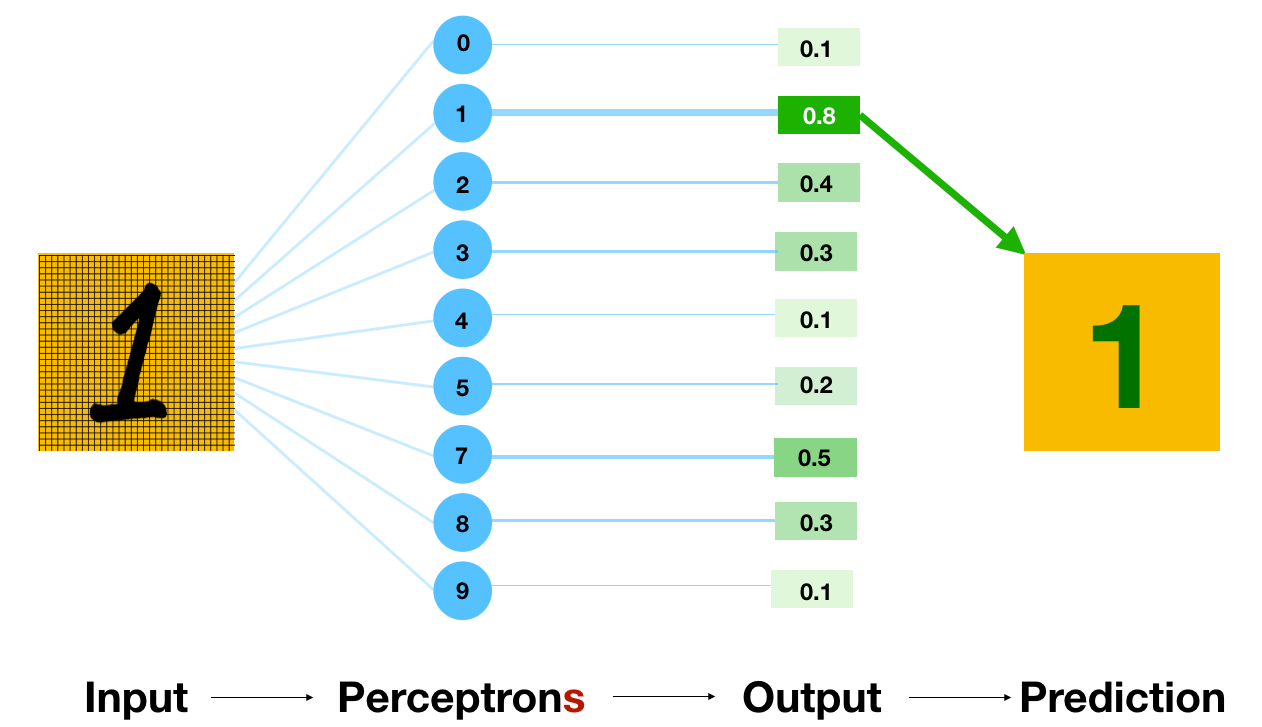

> Perceptron is a binary classifier, but it's adapted for multi-class problems using the One-vs-Rest strategy. Instead of training a single model, the system is built from N independent perceptrons, where N is the number of classes. During training, each perceptron is trained to separate its specific class from all the other classes combined. When making a prediction for a new input, the data is fed into all N perceptrons. Each perceptrons calculates a score ($\text{Score}_n = W_n \cdot x + b_n$). For the final decision, the model simply selects the class whose perceptron produced the highest score. We can see in the image that the the score for test_image of 1 is having higher score for class= 1 which is 0.8. Although class=7 has a score of 0.5, the highest score is taken into consideration


## Task 2: Train a multi-layer Perceptron with one hidden layer (of width 20) (Weight 30/100)

Let's try going wide first

* Set the regularizing parameter to 0.001 (alpha = 0.001). We have looked at regularisation before in the context of machine learning algorithms. It is important, but we won't investigate it further here. We'll leave this fixed.
* Set verbose = 1, so we can look at what is happenign on each epoch (iteration)
* Set random_state=42 (or some constant), so the test is repeatible
* For the moment, set hidden_layer_sizes to (20,).

This tuple then sets the number of hidden layers. The number of values in the tuple is the number of layers, and the number of each value is the number of nodes in that layer. So a tuple of (50,30,10) would be one layer with 50 nodes, connect to a second hidden layer with 30 nodes and a final hidden layer with 10 nodes). But for the moment, just go for one hidden layer with 20 nodes.

Also print the __training and test accuracy score__ of our current network (remember the `accuracy_score` function from `sklearn.metrics`?). The score on the test dataset should not be too bad at this point. That's quite impressive for a first stab at a neural network. Let's see if we can do better, though!

Insert your code below:

In [33]:
from sklearn.neural_network import MLPClassifier

#Building a multi-layer perceptron
mlp_model = MLPClassifier(
    hidden_layer_sizes=(20,),
    activation='relu',  # ReLU is the default and a good choice for hidden layers
    solver='adam',      # Adam is the default and an efficient optimizer
    alpha=0.001,
    max_iter=100,       # Setting a max_iter for safety
    random_state=42,
    verbose=1
)

# Train the model
mlp_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred_mlp = mlp_model.predict(X_train)

# Predict on the test set
y_test_pred_mlp = mlp_model.predict(X_test)

Iteration 1, loss = 0.63694337
Iteration 2, loss = 0.42164645
Iteration 3, loss = 0.38535054
Iteration 4, loss = 0.36383913
Iteration 5, loss = 0.34813527
Iteration 6, loss = 0.33768227
Iteration 7, loss = 0.32787307
Iteration 8, loss = 0.31877473
Iteration 9, loss = 0.31273850
Iteration 10, loss = 0.30589746
Iteration 11, loss = 0.30077320
Iteration 12, loss = 0.29494709
Iteration 13, loss = 0.29002717
Iteration 14, loss = 0.28651262
Iteration 15, loss = 0.28147188
Iteration 16, loss = 0.27852058
Iteration 17, loss = 0.27410447
Iteration 18, loss = 0.26965846
Iteration 19, loss = 0.26697489
Iteration 20, loss = 0.26476729
Iteration 21, loss = 0.26061752
Iteration 22, loss = 0.25837311
Iteration 23, loss = 0.25521327
Iteration 24, loss = 0.25324707
Iteration 25, loss = 0.25088711
Iteration 26, loss = 0.24719658
Iteration 27, loss = 0.24568272
Iteration 28, loss = 0.24520760
Iteration 29, loss = 0.24269275
Iteration 30, loss = 0.24011360
Iteration 31, loss = 0.23781009
Iteration 32, los

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
from sklearn.metrics import accuracy_score

# Calculate accuracy scores
train_accuracy_mlp = accuracy_score(y_train, y_train_pred_mlp)
test_accuracy_mlp = accuracy_score(y_test, y_test_pred_mlp)

print(f"MLP Training Accuracy: {train_accuracy_mlp:.4f}")
print(f"MLP Test Accuracy: {test_accuracy_mlp:.4f}")

MLP Training Accuracy: 0.9411
MLP Test Accuracy: 0.8652


#### Questions: (answer here)

1. What is the size of the input layer here? Explain
2. What is the size of the output layer here? Explain
3. How many weights in total does the algorithm learn?
4. What does it mean that the training accuracy and the test accuracy are different?

Enter your text here:

**1. What is the size of the input layer here? Explain**
> The dimensions of Fashion-MNIST images are 28 x 28 pixels. Since the input image is flattened into a single vector for the network, the input layer must have 784 nodes to get all the pixel values. So, the input layer size is 784.



**2. What is the size of the output layer here? Explain**

> The number of unique classes in the Fashion-MNIST dataset is 10(T-shirt, Trouser, Pullover, etc.). In a multi-class classification problem, the output layer requires one node for each possible class to provide the prediction scores. So, the output layer size is 10.



**3. How many weights in total does the algorithm learn?**

> In total, the algorithm learns about 15,910 weights. The calculation is shown below:

**1. Calculation of Weights (W)**

---
Connection & Weights


---

Input to Hidden (784x20) = 15,680

Hidden to Output (20x10) = 200

Total Weights (15,680 + 200) = **15,880**



**2. Calculation of Biases (b)**



---
Layer & Biases

---

Hidden  (20x1) = 20

Output (10x1) = 10

Total (20+10) = **30**

---
**3. Total**

---
Total  = Total Weights + Total Biases

15,880 + 30 = **15,910**

---











**4. What does it mean that the training accuracy and the test accuracy are different?**

> The difference between the high training accuracy (0.9411) and the lower test accuracy (0.8652) is known as the generalization gap. This difference indicates the model is likely overfitting the training data. While it performs great on data it has seen, its ability to generalize to new, unseen data is significantly reduced.



#### Wider, wider, wider

Let's go wider. We have quite a lot of input features, and somehow it might seem that if we immediately connect this to a layer with only 20 neurons that something might be lost?

Let's see if more features help!

Iterate over a wider number of neurons, and plot the train accuracy and test accuracy as a graph. Iterate over a set of widths of `(20, 50, 100, 200)`.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

Enter your code here:

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

train_accuracies = []
test_accuracies = []

widths = (20, 50, 100, 200)

# Iterate over different hidden layer widths
for width in widths:
    # Set the hidden layer sizes tuple for a single layer of the current width
    hidden_layer_sizes = (width,)

    # Initialize the MLP model
    mlp_model = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation='relu',
        solver='adam',
        alpha=0.001,
        max_iter=100,
        random_state=42,
        verbose=0
    )

    # Train the model
    mlp_model.fit(X_train, y_train)

    # Predict and calculate accuracies
    y_train_pred_mlp = mlp_model.predict(X_train)
    y_test_pred_mlp = mlp_model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred_mlp)
    test_acc = accuracy_score(y_test, y_test_pred_mlp)

    # Store the results
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Width {width}: Train Acc={train_acc:.4f}, Test Acc={test_acc:.4f}")

print("\n--- Training Complete ---")

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Width 20: Train Acc=0.9411, Test Acc=0.8652


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Width 50: Train Acc=0.9853, Test Acc=0.8742
Width 100: Train Acc=0.9864, Test Acc=0.8802


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Width 200: Train Acc=0.9922, Test Acc=0.8870

--- Training Complete ---


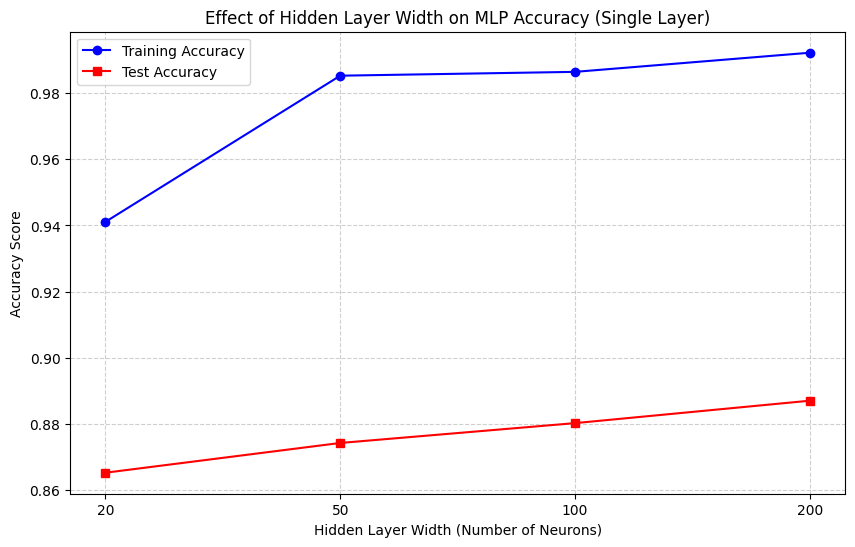

In [39]:
import matplotlib.pyplot as plt

# Convert widths to string labels
width_labels = [str(w) for w in widths]

plt.figure(figsize=(10, 6))

# Plot training accuracy
plt.plot(width_labels, train_accuracies, marker='o', label='Training Accuracy', color='blue')

# Plot test accuracy
plt.plot(width_labels, test_accuracies, marker='s', label='Test Accuracy', color='red')

# Add labels and title
plt.title('Effect of Hidden Layer Width on MLP Accuracy (Single Layer)')
plt.xlabel('Hidden Layer Width (Number of Neurons)')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Questions:

1. When you trained for all the different widths, did you notice anything about how long each training took? Discuss this.

2. What can you infer from the graph?

For the second question, think about the following:
* For the number of neurons you have tested, what is the best? (Highest performance -vs- lowest number of neurons)
* How many weights are learned by the algorithm for our optimal solution?
* Is there any evidence of overfitting occuring? Discuss this. What could we do to reduce this, if it is evident? (No need to implement anything to address tyhe overfitting, just comment)
(Hint: a large divergence between training accuracy and testing accuracy can indicate over-fitting).

Enter your text here:

**1. When you trained for all the different widths, did you notice anything about how long each training took? Discuss this.**

> While training for the different widths = (20, 50, 100, 200), I noticed that each training took around 1 min, 1:40 mins, 2:20 mins and 4 mins respectively. This increase in training time is due to the exponential growth in complexity as the layer width increases. Going from 20 to 200 nodes meant the algorithm had to calculate and update weights for approximately 10 times more parameters. The training process (Adam optimizer) must perform more matrix multiplications during both the forward and backward passes of every epoch, linearly increasing the computational load and, thus, the time required for training.



**2. What can you infer from the graph?**

> The graph shows that widening the network improves overall accuracy . However, the best trade-off between performance and complexity is at 50 neurons, giving a good test score (0.874) with lower cost than wider networks. The 100 and 200 neuron models exhibit overfitting, as there is a growing difference between the nearly perfect training accuracy (0.99) and the stagnant test accuracy. Our optimal solution of 50 neurons learns 39,760 total parameters. To reduce this overfitting, we can increase the regularization parameter or use Dropout.



## Task 3: The deeper the better! (Weight 30/100)

Previously, we only had a single hidden layer, and we went as wide as a couple of hundred neurons. That is a lot of neurons and a lot of computation. Can we do better with fewer neurons by going deeper and using more layers? Now we're going to start playing with different configurations.

Rerun the above loop, but let's use a set of deeper networks. These are going to be simply designed. Use something like:
`layers = ((20,20),(20,20,20),(50,20),(100,100,50))`

Plot the train and test accuracy as a graph.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

**Note**: you might be feeling at this point that picking the neural network architecture is kind of random. At the moment, it is, to be honest. How many neurons per layer should I use? How many layers? And then I have to pick the training parameters on top of this?? These are all called hyperparameters of the network, and there is a lot of skill to develop to be able to design networks efficiently and pick the right training parameters.

Enter your code here:

In [43]:
layers = ((20,20),(20,20,20),(50,20),(100,100,50))  # DO NOT CHANGE THE VALUES

train_accuracies_deep = []  # DO NOT CHANGE THE NAME
test_accuracies_deep = []  # DO NOT CHANGE THE NAME

# Iterate over different deep network architectures
for hidden_layer_tuple in layers:

    # Initialize the MLP model
    mlp_model = MLPClassifier(
        hidden_layer_sizes=hidden_layer_tuple,
        activation='relu',
        solver='adam',
        alpha=0.001,
        max_iter=100,
        random_state=42,
        verbose=0
    )

    # Train the model
    mlp_model.fit(X_train, y_train)

    # Predict and calculate accuracies
    y_train_pred_mlp = mlp_model.predict(X_train)
    y_test_pred_mlp = mlp_model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred_mlp)
    test_acc = accuracy_score(y_test, y_test_pred_mlp)

    # Store the results
    train_accuracies_deep.append(train_acc)
    test_accuracies_deep.append(test_acc)

    print(f"Layers {hidden_layer_tuple}: Train Acc={train_acc:.4f}, Test Acc={test_acc:.4f}")

print("\n--- Training Complete ---")

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Layers (20, 20): Train Acc=0.9457, Test Acc=0.8651


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Layers (20, 20, 20): Train Acc=0.9490, Test Acc=0.8684


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Layers (50, 20): Train Acc=0.9886, Test Acc=0.8735


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Layers (100, 100, 50): Train Acc=0.9956, Test Acc=0.8934

--- Training Complete ---


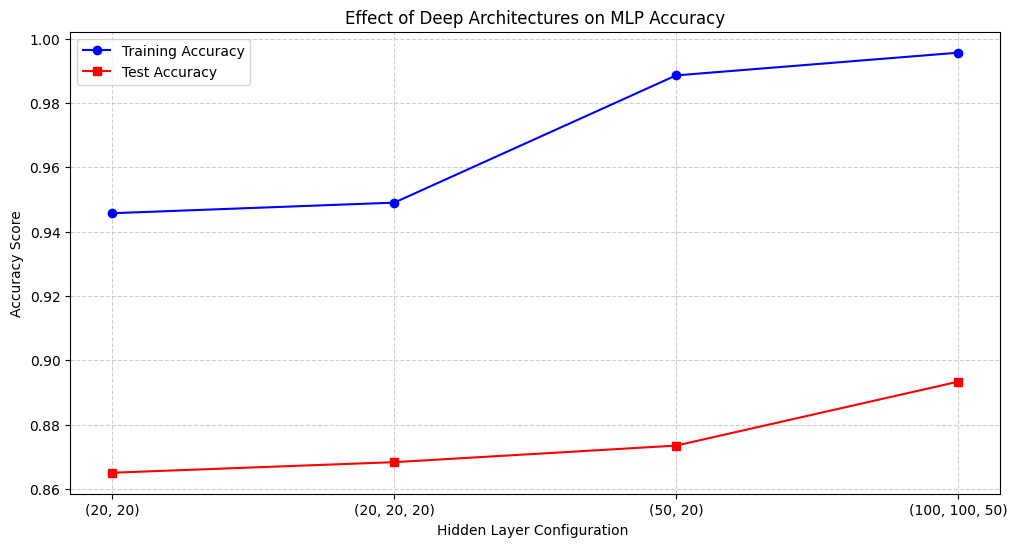

In [48]:
import matplotlib.pyplot as plt

# Create descriptive labels for the x-axis
layer_labels = [str(l) for l in layers]

plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.plot(layer_labels, train_accuracies_deep, marker='o', label='Training Accuracy', color='blue')

# Plot test accuracy
plt.plot(layer_labels, test_accuracies_deep, marker='s', label='Test Accuracy', color='red')

# Add labels and title
plt.title('Effect of Deep Architectures on MLP Accuracy')
plt.xlabel('Hidden Layer Configuration ')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### Questions

What can you infer from the graph? (answer in the text box here).

Think about the following:
* Do I have a deeper network that has fewer neurons but is doing better than my very wide network?
* How many weights did I need to train?

Enter your text here:


> The graph shows that simply going deeper didn't immediately outperform going wide; the deep (20, 20, 20) network's accuracy (0.8684) was lower than the widest single-layer model (0.8753). The (100, 100, 50) configuration achieved the highest test score (0.8934), but required training a massive 99,660 parameters. Also, the large and growing gap between training and test accuracy in all models strongly indicates overfitting.



## Task 4: Confusion matrix (Weight 10/100)

A [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) is a powerful way to visualise errors in your trained network. Plot a confusion matrix for your best model above (of course, plot using the test data).

Describe what you see in the confusion matrix.

Enter your code here:

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


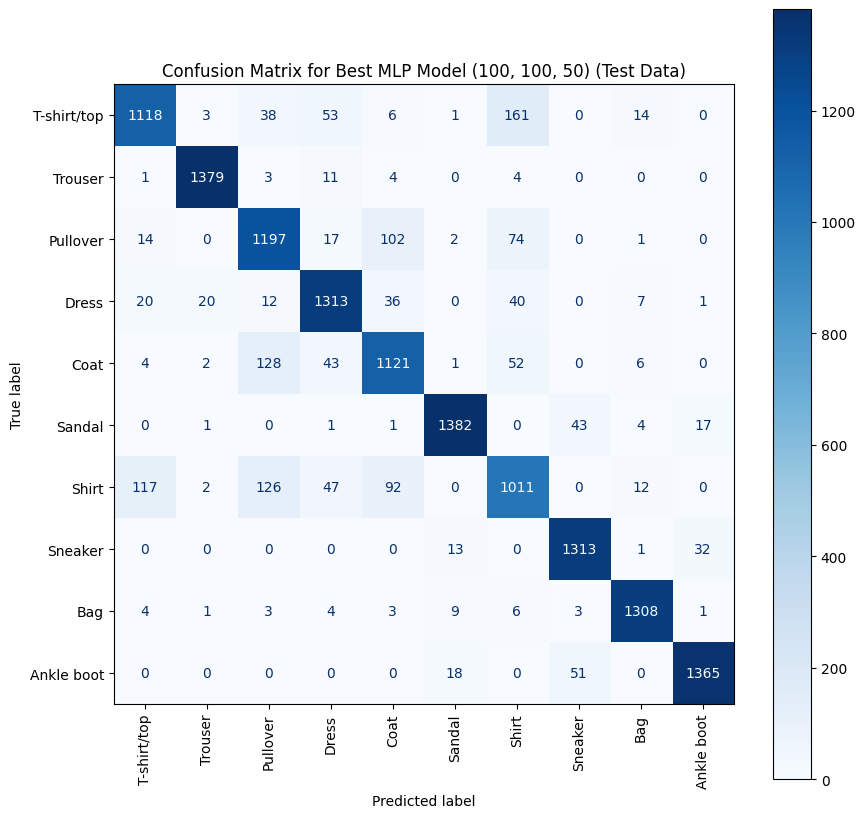

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

BEST_LAYERS = (100, 100, 50)
text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 1. Train the Best Model
best_mlp_model = MLPClassifier(
    hidden_layer_sizes=BEST_LAYERS,
    alpha=0.001,
    max_iter=100,
    random_state=42,
    verbose=0
)
best_mlp_model.fit(X_train, y_train)

# 2. Predict using Test Data
y_test_pred_best = best_mlp_model.predict(X_test)

# 3. Calculate and Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_best)

fig, ax = plt.subplots(figsize=(10, 10))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=text_labels)
cmd.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
plt.title(f'Confusion Matrix for Best MLP Model {BEST_LAYERS} Test Data')
plt.show()


Enter your text here:



>The confusion matrix shows excellent performance on distinct items like Trouser, Sandal, Sneaker, and Ankle boot, indicated by the dark diagonal cells for those classes. The main source of error lies in misclassifying similar upper-body garments, particularly confusing Shirt with T-shirt/top and Pullover. For instance, 117 actual Shirts were mistakenly predicted as T-shirts/tops, highlighting where the model needs improvement. Overall, the matrix confirms the high accuracy while clearly revealing the specific class-to-class ambiguities that remain unresolved.

